### Data information

- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

### Dataset Characteristics

- instant: record index
- dteday : date
- season : 
    - 1: spring, 
    - 2: summer, 
    - 3: fall, 
    - 4: winter
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.preprocessing import OneHotEncoder

sns.set_theme(style = "whitegrid")

In [17]:
bikes = pd.read_csv("data/hour.csv")
bikes = bikes.set_index("dteday")
bikes = bikes.drop(columns=["instant", "yr", "mnth", "casual", "registered"])

In [18]:
INDEX_TO_SEASON = {
    1: 'Primavera',
    2: 'Verão',
    3: 'Outono',
    4: 'Inverno'
}
INDEX_TO_WEATHER = {
    1: "Limpo/Parcialmente Nublado",
    2: "Neblina",
    3: "Neve/Chuvoso",
    4: "Chuva Forte/Neve + Névoa",
}
N_LAGS = 48

In [53]:
#bikes["season"] = bikes["season"].apply(lambda x: INDEX_TO_SEASON[x])
#bikes["holiday"] = bikes["holiday"].apply(lambda x: "Sim" if x == 1 else "Não")
#bikes["workingday"] = bikes["workingday"].apply(lambda x: "Sim" if x == 1 else "Não")
#bikes["weather"] = bikes["weather"].apply(lambda x: INDEX_TO_WEATHER[x])

In [19]:
# Count Nans
print(bikes.shape)
print(bikes.count())

(17379, 11)
season        17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


In [20]:
# One-Hot Encoder for categorical columns
categorical_columns = ["season", "weathersit", "holiday", "workingday"]

for col in categorical_columns:
    ohe = OneHotEncoder(sparse=False)
    new_cols = ohe.fit_transform(bikes[[col]])
    print(ohe.categories_)
    bikes[[f"{col}={c}" for c in ohe.categories_[0]]] = new_cols

# Drop original categorical columns
bikes = bikes.drop(columns=categorical_columns)

[array([1, 2, 3, 4])]
[array([1, 2, 3, 4])]
[array([0, 1])]
[array([0, 1])]


In [21]:
bikes

,hr,weekday,temp,atemp,hum,windspeed,cnt,season=1,season=2,season=3,season=4,weathersit=1,weathersit=2,weathersit=3,weathersit=4,holiday=0,holiday=1,workingday=0,workingday=1
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,0,6,0.24,0.2879,0.81,0.0000,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,1,6,0.22,0.2727,0.80,0.0000,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,2,6,0.22,0.2727,0.80,0.0000,32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,3,6,0.24,0.2879,0.75,0.0000,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,4,6,0.24,0.2879,0.75,0.0000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,19,1,0.26,0.2576,0.60,0.1642,119,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2012-12-31,20,1,0.26,0.2576,0.60,0.1642,89,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2012-12-31,21,1,0.26,0.2576,0.60,0.1642,90,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
# Normalização de valores (min max)
normalized_bikes = (bikes - bikes.min()) / (bikes.max() - bikes.min())

# Box plot para análise de outliers (em variáveis não categóricas)
def plot_boxplot(bikes: pd.DataFrame, save=True, plot=False):
    fig, ax = plt.subplots(figsize=(18, 8))
    
    ax.set_title('Boxplot dos dados não categóricos normalizados', weight='bold', fontsize=25)
    data = pd.melt(bikes)
    data.rename(columns={"variable": "atributos", "value": "valores"}, inplace=True)
    sns.boxplot(x="atributos", y="valores",data=data)

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
    if save:
        fig.savefig(f"preproc/pre_outlier_boxplot.png")
    
    if not plot:
        plt.close()

    return fig


In [23]:
normalized_bikes

,hr,weekday,temp,atemp,hum,windspeed,cnt,season=1,season=2,season=3,season=4,weathersit=1,weathersit=2,weathersit=3,weathersit=4,holiday=0,holiday=1,workingday=0,workingday=1
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,0.000000,1.000000,0.224490,0.2879,0.81,0.000000,0.015369,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,0.043478,1.000000,0.204082,0.2727,0.80,0.000000,0.039959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,0.086957,1.000000,0.204082,0.2727,0.80,0.000000,0.031762,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,0.130435,1.000000,0.224490,0.2879,0.75,0.000000,0.012295,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2011-01-01,0.173913,1.000000,0.224490,0.2879,0.75,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,0.826087,0.166667,0.244898,0.2576,0.60,0.193018,0.120902,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2012-12-31,0.869565,0.166667,0.244898,0.2576,0.60,0.193018,0.090164,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2012-12-31,0.913043,0.166667,0.244898,0.2576,0.60,0.193018,0.091189,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


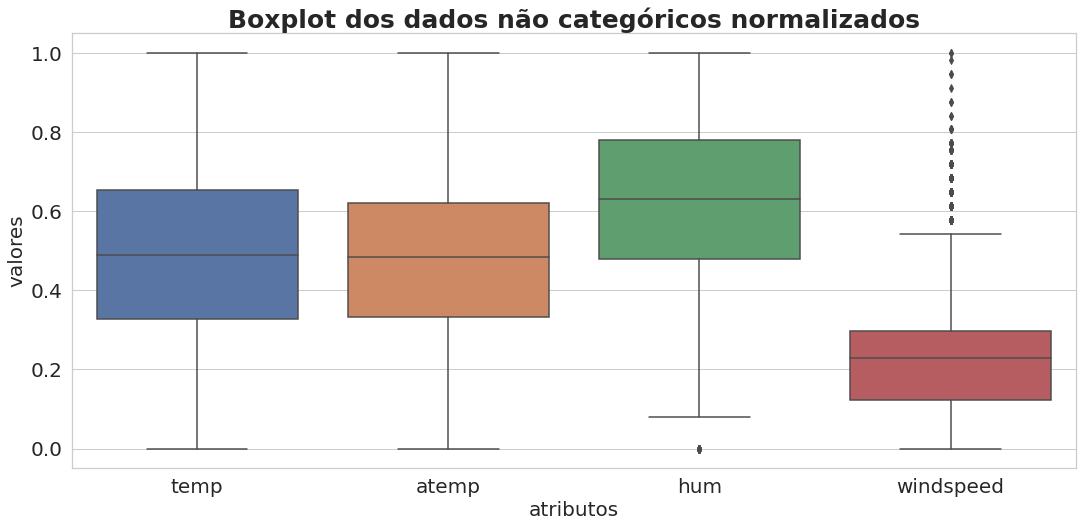

In [24]:
non_categorical = ["temp","atemp","hum","windspeed"]
plot_boxplot(normalized_bikes[non_categorical])

In [27]:
normalized_bikes = normalized_bikes[normalized_bikes['hum'] > 0]

In [34]:
normalized_bikes['dlog_cnt'] = (normalized_bikes['cnt'].apply(np.log) - normalized_bikes['cnt'].apply(np.log).shift(7))

/tmp/ipykernel_36747/2164593094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_bikes['dlog_cnt'] = (normalized_bikes['cnt'].apply(np.log) - normalized_bikes['cnt'].apply(np.log).shift(7))


In [43]:
normalized_bikes.dropna(inplace=True)
normalized_bikes = normalized_bikes[normalized_bikes['dlog_cnt'] != np.inf]
normalized_bikes = normalized_bikes[normalized_bikes['dlog_cnt'] != -np.inf]

/tmp/ipykernel_36747/2538696055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_bikes.dropna(inplace=True)


In [44]:
normalized_bikes

,hr,weekday,temp,atemp,hum,windspeed,cnt,season=1,season=2,season=3,season=4,weathersit=1,weathersit=2,weathersit=3,weathersit=4,holiday=0,holiday=1,workingday=0,workingday=1,dlog_cnt
dteday,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.304348,1.000000,0.183673,0.2576,0.86,0.000000,0.002049,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.014903
2011-01-01,0.347826,1.000000,0.224490,0.2879,0.75,0.000000,0.007172,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.717651
2011-01-01,0.391304,1.000000,0.306122,0.3485,0.76,0.000000,0.013320,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.869038
2011-01-01,0.434783,1.000000,0.367347,0.3939,0.76,0.298225,0.035861,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.070441
2011-01-01,0.565217,1.000000,0.448980,0.4545,0.72,0.350888,0.095287,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.532599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,0.826087,0.166667,0.244898,0.2576,0.60,0.193018,0.120902,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.636487
2012-12-31,0.869565,0.166667,0.244898,0.2576,0.60,0.193018,0.090164,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.830931
2012-12-31,0.913043,0.166667,0.244898,0.2576,0.60,0.193018,0.091189,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.016695


In [45]:
normalized_bikes.to_csv("data/bikes.csv")

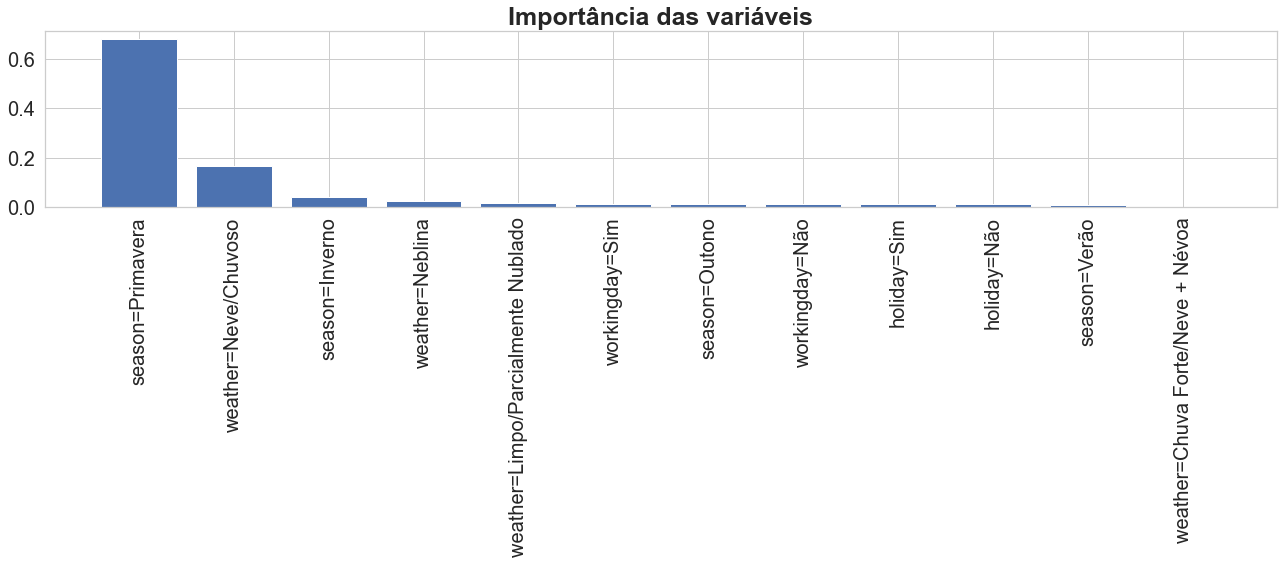

In [64]:
figure, ax = plt.subplots(figsize=(18, 8))
feature_importance = pd.DataFrame({"feature": clf.feature_names_in_, "importance": clf.feature_importances_}).sort_values("importance", ascending=False)
plt.bar(feature_importance.feature, feature_importance.importance)

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.title("Importância das variáveis", weight='bold', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"preproc/pre_feature_importance.png")
plt.show()

In [65]:
feature_importance.importance.cumsum()

2     0.680151
7     0.848499
0     0.888575
6     0.912994
5     0.930257
11    0.942858
1     0.955197
10    0.966958
9     0.978503
8     0.989930
3     0.999977
4     1.000000
Name: importance, dtype: float64